In [6]:
import my_lib as my
import matplotlib.pyplot as plt
import numpy as np
import scipy as s
import pandas as pd
from scipy import stats
from math import log10, floor,pi,sqrt,tan

m=0.001
u=0.000001
n=0.000000001
p=0.000000000001
k=1000
M=1000000
G=1000000000
T=1000000000000

def Pw2(x):
    return np.power(x,2)

def f_th(R1,R2):
    Rm = np.sqrt(R1*R2)
    f = pi*np.sqrt(Rm)/(1-Rm)
    return f

def cr_th(R1,R2):
    Rm = np.sqrt(R1*R2)
    cr = Pw2( (1+Rm)/(1-Rm) )
    return cr

def RM(R1,R2):
    Rm = np.sqrt(R1*R2)
    return Rm

In [7]:
# formule per i fit


def f_fit(coo,scoo):
    f = pi*sqrt(coo/4)
    sf = pi/(4*np.sqrt(coo))
    return f,sf

def cr_fit(coo,scoo = 0):
    cr = 1+coo
    dcr = scoo
    return cr,dcr

def coo_th(R1,R2):
    coo = 4*(f_th(R1,R2)/pi)**2
    return coo

In [8]:
R_m = [[0.80,0.85],[0.85,0.85],[0.90,0.90],[0.92,0.95],[0.95,0.95]]
name = ['Data2/8085.csv','Data2/8585.csv','Data2/9090.csv','Data2/9295.csv','Data2/9595_cut.csv']
title = ['R: 80-85','R: 85-85','R: 90-90','R: 92-95','R: 95-95']
div = [0.05,0.05,0.05,0.025,0.025]
bounds_min =[[0,2,5,-5,-1000],  
             [5,1,8.5,-10,-1000],
             [5,2.2,2.5,-1,-1000],
             [1,0,1.5,-10,-100],
             [10,0,2,-10,-1000]]
bounds_max =[[100,3,8,5,1000],
             [200,3,10,10,1000],
             [1000,3,4,10,1000],
             [200,5,2,10,100],
             [200,5,2.3,10,1000]] 



def Airy_fit(x,coo,b,a,phi,c):
    I = a/(1+coo*Pw2(np.sin(b*(x+phi)))) + c
    return I

Finesse_fit  = np.asarray([])
C_Ratio_fit  = np.asarray([])
Finesse_th  = np.asarray([])
C_Ratio_th  = np.asarray([])
array_f = np.asarray([])
array_c = np.asarray([])
array_R = np.asarray([])

R = 0.8 | 0.85
Reduced Chi2=  0.6187201462687396
f theory = 16.266713635982587
f fit    = 10.555881319032423 +- 0.11687328730304952
cr theory = 108.24076133623181
cr fit    = 46.15951233433388 +- 0.4753740074539964


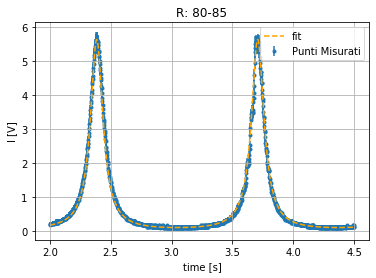

R = 0.85 | 0.85
Reduced Chi2=  0.516541661101012
f theory = 19.309368757650553
f fit    = 15.287852904665787 +- 0.08069809134281045
cr theory = 152.1111111111111
cr fit    = 95.72251852724774 +- 0.9286679499729236


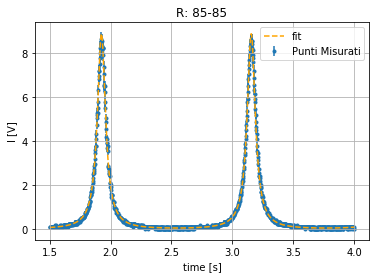

R = 0.9 | 0.9
Reduced Chi2=  2.0524906799820393
f theory = 29.803764797388308
f fit    = 21.912582423486636 +- 0.05630101127714862
cr theory = 361.0000000000001
cr fit    = 195.60203224076443 +- 2.4098796251379864


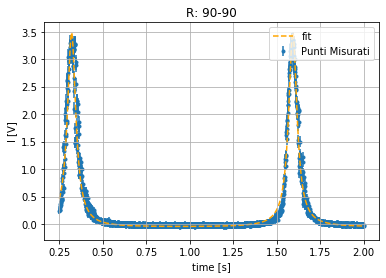

R = 0.92 | 0.95
Reduced Chi2=  1.894765171156227
f theory = 46.64564980955998
f fit    = 11.918384017714118 +- 0.10351240137107
cr theory = 882.825271908952
cr fit    = 58.56983636670373 +- 0.752087963782092


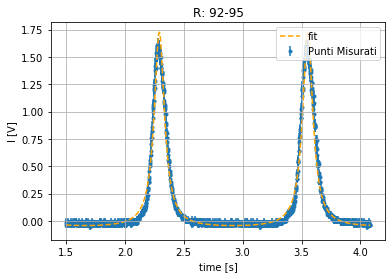

R = 0.95 | 0.95
Reduced Chi2=  2.4087138724683514
f theory = 61.2409150194047
f fit    = 19.404320365803354 +- 0.06357865294320467
cr theory = 1520.9999999999973
cr fit    = 153.60090822573255 +- 2.098156490616676


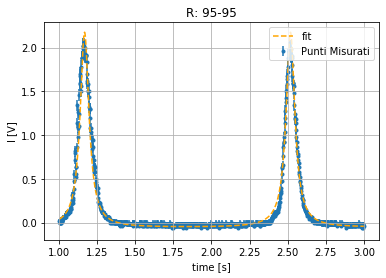

In [9]:
for T in range(len(name)):
    R1 = R_m[T][0]
    R2 = R_m[T][1]
    df= pd.read_csv(name[T])
    t = np.asarray(df.iloc[:,0])
    CH2  = np.asarray(df.iloc[:,2])

    X = t
    Y = CH2
    
    sY = 0.03*CH2 + div[T]
    [coo,b,a,phi,c],pcov = s.optimize.curve_fit(Airy_fit,X,Y,sigma = sY,absolute_sigma = True,method = 'trf',bounds = (bounds_min[T],bounds_max[T]))
    [scoo,sb,sa,sphi,sc] = np.sqrt(np.diag(pcov))

    Yexp = Airy_fit(X,coo,b,a,phi,c)
    chi2 = np.sum( ( (Yexp - Y)/sY )**2 )/(len(X)-6)
   

    x = np.linspace(np.min(X),np.max(X),10000)
    y = Airy_fit(x,coo,b,a,phi,c)

    plt.errorbar(X,Y,yerr=sY, ls='', marker='.',label = 'Punti Misurati', zorder = 0)
    plt.plot(x,y,label = 'fit',color = 'orange',ls = '--',zorder = 1)

    plt.title(title[T])
    plt.xlabel('time [s]')
    plt.ylabel('I [V]')
    plt.grid()
    plt.legend(loc = 'upper right')

    f,sf = f_fit(coo,scoo = scoo)
    cr,scr = cr_fit(coo,scoo = scoo)
    theory = f_th(R1,R2),cr_th(R1,R2)
    
    A = '{} +- {}'.format(f,sf)
    B = '{} +- {}'.format(cr,scr)
    
    array_R = np.append(array_R,RM(R1,R2))
    array_f = np.append(array_f,f)
    array_c = np.append(array_c,cr)
    Finesse_fit = np.append(Finesse_fit,A)
    C_Ratio_fit = np.append(C_Ratio_fit,B)
    Finesse_th = np.append(Finesse_th,theory[0])
    C_Ratio_th= np.append(C_Ratio_th,theory[1])
    
    #print(coo,b,a,phi,c)
    print('R =',R1,'|',R2)
    print('Reduced Chi2= ',chi2)
    print('f theory =', theory[0])
    print('f fit    =',A)
    print('cr theory =', theory[1])
    print('cr fit    =',B)
    plt.show()

In [10]:
Results = pd.DataFrame({'':title,'F Theory':Finesse_th,'Finesse fit':Finesse_fit,'CR Theory':C_Ratio_th,'Contrast Ratio fit':C_Ratio_fit})
Results

,,F Theory,Finesse fit,CR Theory,Contrast Ratio fit
0,R: 80-85,16.266714,10.555881319032423 +- 0.11687328730304952,108.240761,46.15951233433388 +- 0.4753740074539964
1,R: 85-85,19.309369,15.287852904665787 +- 0.08069809134281045,152.111111,95.72251852724774 +- 0.9286679499729236
2,R: 90-90,29.803765,21.912582423486636 +- 0.05630101127714862,361.000000,195.60203224076443 +- 2.4098796251379864
3,R: 92-95,46.645650,11.918384017714118 +- 0.10351240137107,882.825272,58.56983636670373 +- 0.752087963782092
4,R: 95-95,61.240915,19.404320365803354 +- 0.06357865294320467,1521.000000,153.60090822573255 +- 2.098156490616676


In [9]:
print(Results.to_latex(index=False))

\begin{tabular}{lrlrl}
\toprule
          &   F Theory &                                Finesse fit &    CR Theory &                        Contrast Ratio fit \\
\midrule
 R: 80-85 &  16.266714 &  10.555881319032423 +- 0.11687328730304952 &   108.240761 &   46.15951233433388 +- 0.4753740074539964 \\
 R: 85-85 &  19.309369 &  15.287852904665787 +- 0.08069809134281045 &   152.111111 &   95.72251852724774 +- 0.9286679499729236 \\
 R: 90-90 &  29.803765 &  21.912582423486636 +- 0.05630101127714862 &   361.000000 &  195.60203224076443 +- 2.4098796251379864 \\
 R: 92-95 &  46.645650 &     11.918384017714118 +- 0.10351240137107 &   882.825272 &    58.56983636670373 +- 0.752087963782092 \\
 R: 95-95 &  61.240915 &  19.404320365803354 +- 0.06357865294320467 &  1521.000000 &   153.60090822573255 +- 2.098156490616676 \\
\bottomrule
\end{tabular}



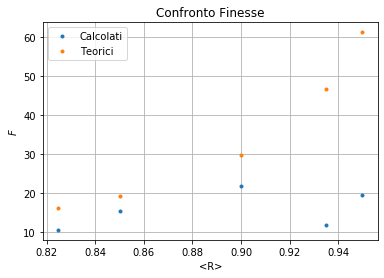

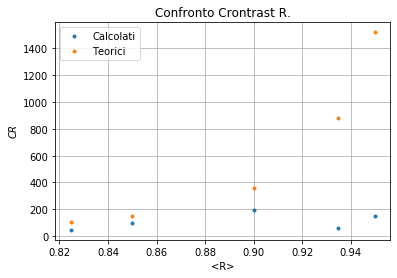

In [13]:
plt.plot(array_R,array_f, ls='', marker='.',label = 'Calcolati')
plt.plot(array_R,Finesse_th, ls='', marker='.',label = 'Teorici')

plt.title('Confronto Finesse')
plt.xlabel('<R>')
plt.ylabel('$F$')
plt.grid()
plt.legend()
plt.show()

plt.plot(array_R,array_c, ls='', marker='.',label = 'Calcolati')
plt.plot(array_R,C_Ratio_th, ls='', marker='.',label = 'Teorici')

plt.title('Confronto Crontrast R.')
plt.xlabel('<R>')
plt.ylabel('$CR$')
plt.grid()
plt.legend()
plt.show()

In [285]:
# Pt3 Formule e costanti

def Ordine(xn_1,xn,Z):
    m = np.abs(2*Pw2(Z)/( (xn_1-xn)*(xn_1+xn) ))
    return m

def SigmaOrdine(xn_1,xn,Z, sxn_1 = 0,sxn = 0, sZ = 0 ):
    dxn   =  4*xn*Pw2(Z)/(Pw2(xn_1-xn)*Pw2(xn_1+xn)) *sxn
    dxn_1 = -4*xn_1*Pw2(Z)/(Pw2(xn_1-xn)*Pw2(xn_1+xn)) *sxn_1
    dZ    = 4*Z/(Pw2(xn_1) - Pw2(xn)) *sZ
    sm = np.sqrt(Pw2(dxn) + Pw2(dxn_1) + Pw2(sZ))
    return sm

def Lambda(B,sB = 0):
    L = 2/B*M
    sL = 2/Pw2(B)*M *sB
    return L,sL

def dist(A,B,sA = 0,sB = 0):
    d  = A/B
    dA = 1/B *sA
    dB = -A/Pw2(B) *sB
    sd = np.sqrt(Pw2(dA) + Pw2(dB))
    return d,sd

In [308]:
Z = 472 #mm
sZ = 3

xn_1 = np.asarray([16.7,10.9,10.2,16.1])
xn   = np.asarray([20.3,14.3,13.3,18.2])

sxn_1 = np.full(len(xn_1),0.1)
sxn = np.full(len(xn),0.1)

d = np.asarray([0,0.5,0.75,1])

m = Ordine(xn_1,xn,Z)
sm = SigmaOrdine(xn_1,xn,Z, sxn_1 = sxn_1,sxn = sxn, sZ = sZ )

Lambda = 591.9835717027959 +- 52.22710082693026 [nm]
d0 = 1.0005105334990219 +- 0.09616393597635656 [mm]


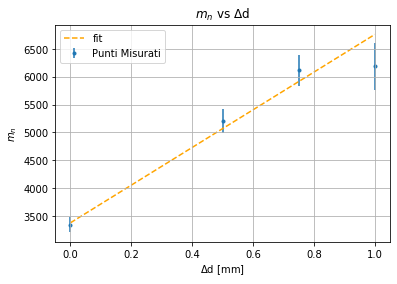

In [309]:
def lin_fit(x,B,A):
    return B*x + A

[B,A],pcov = s.optimize.curve_fit(lin_fit,d,m,sigma = sm,absolute_sigma = True)
[sB,sA] = np.sqrt(np.diag(pcov))

L,sL   = Lambda(B,sB = sB)
d0,sd0 = dist(A,B,sA = sA,sB = sB)

x = np.linspace(np.min(d),np.max(d),100)
y = lin_fit(x,B,A)

plt.errorbar(d,m,yerr=sm, ls='', marker='.',label = 'Punti Misurati', zorder = 0)
plt.plot(x,y,label = 'fit',color = 'orange',ls = '--',zorder = 1)
plt.title('$m_n$ vs $\Delta$d')
plt.xlabel('$\Delta$d [mm]')
plt.ylabel('$m_n$')
plt.grid()
plt.legend()



print('Lambda =',L,'+-',sL,'[nm]')
print('d0 =',d0,'+-',sd0,'[mm]')